### Impor data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('/content/iphone.csv')
print(data.columns)
print(data.shape)


Index(['productAsin', 'country', 'date', 'isVerified', 'ratingScore',
       'reviewTitle', 'reviewDescription', 'reviewUrl', 'reviewedIn',
       'variant', 'variantAsin'],
      dtype='object')
(3062, 11)


In [ ]:
filename = "iphone.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
print(df)

     ï»¿productAsin country        date  isVerified  ratingScore  \
0        B09G9BL5CP   India  11-08-2024        True            4   
1        B09G9BL5CP   India  16-08-2024        True            5   
2        B09G9BL5CP   India  14-05-2024        True            4   
3        B09G9BL5CP   India  24-06-2024        True            5   
4        B09G9BL5CP   India  18-05-2024        True            5   
...             ...     ...         ...         ...          ...   
3057     B09G9D8KRQ   India  11-10-2023        True            1   
3058     B09G9D8KRQ   India  14-10-2022        True            2   
3059     B09G9D8KRQ   India  24-02-2022        True            3   
3060     B09G9D8KRQ   India  16-10-2023        True            1   
3061     B09G9D8KRQ   India  11-11-2023        True            1   

                              reviewTitle  \
0                              No charger   
1                         iPhone 13 256GB   
2                 Flip camera option nill   
3  

In [ ]:
filtered_data = data[data['country']== "India"]
filtered_data.drop(columns = ['productAsin', 'country', 'date', 'isVerified', 'reviewUrl', 'reviewedIn',
       'variant', 'variantAsin'], inplace = True)
print(filtered_data.shape)
print(filtered_data.head())

(2229, 3)
   ratingScore              reviewTitle  \
0            4               No charger   
1            5          iPhone 13 256GB   
2            4  Flip camera option nill   
3            5                  Product   
4            5             Good product   

                                   reviewDescription  
0  Every thing is good about iPhones, there's not...  
1  It look so fabulous, I am android user switche...  
2  I tried to flip camera while recording but no ...  
3                                       100% genuine  
4         Happy to get the iPhone 13 in Amazon offer  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Preprocessing Data**


<h2>Cleaning the text</h2>

In [ ]:
import string
import re

In [ ]:

def clean_text(text):
    # Ubah input menjadi string sebelum menerapkan re.sub
    text = str(text)
    return re.sub('[^a-zA-Z]', ' ', text).lower()

filtered_data['cleaned_text'] = filtered_data['reviewDescription'].apply(lambda x: clean_text(x))
filtered_data['cleaned_text1'] = filtered_data['reviewTitle'].apply(lambda x: clean_text(x))
filtered_data['label'] = filtered_data['ratingScore'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

<h2>Adding additional features - length of, and percentage of punctuations in the text</h2>

In [ ]:
def count_punct(text):
    # Ubah input menjadi string untuk menangani potensi nilai non-string
    text = str(text)
    count = sum([1 for char in text if char in string.punctuation])
    # Periksa apakah panjang teks setelah menghapus spasi adalah 0 untuk menghindari pembagian dengan nol
    if len(text) - text.count(" ") == 0:
        return 0  # Atau nilai lain yang sesuai
    else:
        return round(count/(len(text) - text.count(" ")), 3)*100

filtered_data['Review_len'] = filtered_data['reviewDescription'].apply(lambda x: len(str(x)) - str(x).count(" "))  # Ubah x ke string
filtered_data['punct'] = filtered_data['reviewDescription'].apply(lambda x: count_punct(x))
filtered_data['title_len'] = filtered_data['reviewTitle'].apply(lambda x: len(str(x)) - str(x).count(" "))  # Ubah x ke string
# Diasumsikan 'rreviewTitle' seharusnya 'reviewTitle'
filtered_data['titlepunct'] = filtered_data['reviewTitle'].apply(lambda x: count_punct(x))
filtered_data.head()


,ratingScore,reviewTitle,reviewDescription,cleaned_text,cleaned_text1,label,Review_len,punct,title_len,titlepunct
0,4,No charger,"Every thing is good about iPhones, there's not...",every thing is good about iphones there s not...,no charger,1,361,3.0,9,0.0
1,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",it look so fabulous i am android user switche...,iphone gb,1,164,2.4,13,0.0
2,4,Flip camera option nill,I tried to flip camera while recording but no ...,i tried to flip camera while recording but no ...,flip camera option nill,1,396,2.8,20,0.0
3,5,Product,100% genuine,genuine,product,1,11,9.1,7,0.0
4,5,Good product,Happy to get the iPhone 13 in Amazon offer,happy to get the iphone in amazon offer,good product,1,34,0.0,11,0.0


<h2>Tokenization</h2>

In [ ]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
filtered_data['tokens'] = filtered_data['cleaned_text'].apply(lambda x: tokenize_text(x))
filtered_data['tokens1'] = filtered_data['cleaned_text1'].apply(lambda x: tokenize_text(x))
filtered_data.head()

,ratingScore,reviewTitle,reviewDescription,cleaned_text,cleaned_text1,label,Review_len,punct,title_len,titlepunct,tokens,tokens1
0,4,No charger,"Every thing is good about iPhones, there's not...",every thing is good about iphones there s not...,no charger,1,361,3.0,9,0.0,"[every, thing, is, good, about, iphones, there...","[no, charger]"
1,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",it look so fabulous i am android user switche...,iphone gb,1,164,2.4,13,0.0,"[it, look, so, fabulous, i, am, android, user,...","[iphone, gb]"
2,4,Flip camera option nill,I tried to flip camera while recording but no ...,i tried to flip camera while recording but no ...,flip camera option nill,1,396,2.8,20,0.0,"[i, tried, to, flip, camera, while, recording,...","[flip, camera, option, nill]"
3,5,Product,100% genuine,genuine,product,1,11,9.1,7,0.0,[genuine],[product]
4,5,Good product,Happy to get the iPhone 13 in Amazon offer,happy to get the iphone in amazon offer,good product,1,34,0.0,11,0.0,"[happy, to, get, the, iphone, in, amazon, offer]","[good, product]"


<h2>Lemmatization and Removing Stopwords</h2>

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
filtered_data['lemmatized_review'] = filtered_data['tokens'].apply(lambda x: lemmatize_text(x))
filtered_data['lemmatized_title'] = filtered_data['tokens1'].apply(lambda x: lemmatize_text(x))
filtered_data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,ratingScore,reviewTitle,reviewDescription,cleaned_text,cleaned_text1,label,Review_len,punct,title_len,titlepunct,tokens,tokens1,lemmatized_review,lemmatized_title
0,4,No charger,"Every thing is good about iPhones, there's not...",every thing is good about iphones there s not...,no charger,1,361,3.0,9,0.0,"[every, thing, is, good, about, iphones, there...","[no, charger]",every thing good iphones nothing compared spee...,charger
1,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",it look so fabulous i am android user switche...,iphone gb,1,164,2.4,13,0.0,"[it, look, so, fabulous, i, am, android, user,...","[iphone, gb]",look fabulous android user switched apple perf...,iphone gb
2,4,Flip camera option nill,I tried to flip camera while recording but no ...,i tried to flip camera while recording but no ...,flip camera option nill,1,396,2.8,20,0.0,"[i, tried, to, flip, camera, while, recording,...","[flip, camera, option, nill]",tried flip camera recording facility added pau...,flip camera option nill
3,5,Product,100% genuine,genuine,product,1,11,9.1,7,0.0,[genuine],[product],genuine,product
4,5,Good product,Happy to get the iPhone 13 in Amazon offer,happy to get the iphone in amazon offer,good product,1,34,0.0,11,0.0,"[happy, to, get, the, iphone, in, amazon, offer]","[good, product]",happy get iphone amazon offer,good product


# **EDA**

In [ ]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(filtered_data)} rows and {len(filtered_data.columns)} columns")
print(f"rating 1.0 = {len(filtered_data[filtered_data['ratingScore']==1.0])} rows")
print(f"rating 2.0 = {len(filtered_data[filtered_data['ratingScore']==2.0])} rows")
print(f"rating 3.0 = {len(filtered_data[filtered_data['ratingScore']==3.0])} rows")
print(f"rating 4.0 = {len(filtered_data[filtered_data['ratingScore']==4.0])} rows")
print(f"rating 5.0 = {len(filtered_data[filtered_data['ratingScore']==5.0])} rows")

Input data has 2229 rows and 14 columns
rating 1.0 = 392 rows
rating 2.0 = 120 rows
rating 3.0 = 181 rows
rating 4.0 = 362 rows
rating 5.0 = 1174 rows


In [ ]:
# Missing values in the dataset
print(f"Number of null in label: { filtered_data['ratingScore'].isnull().sum() }")
print(f"Number of null in review: { filtered_data['reviewDescription'].isnull().sum()}")
print(f"Number of null in title: { filtered_data['reviewTitle'].isnull().sum()}")

Number of null in label: 0
Number of null in review: 0
Number of null in title: 0


Number of null in label: 0
Number of null in text: 0
Number of null in text: 0


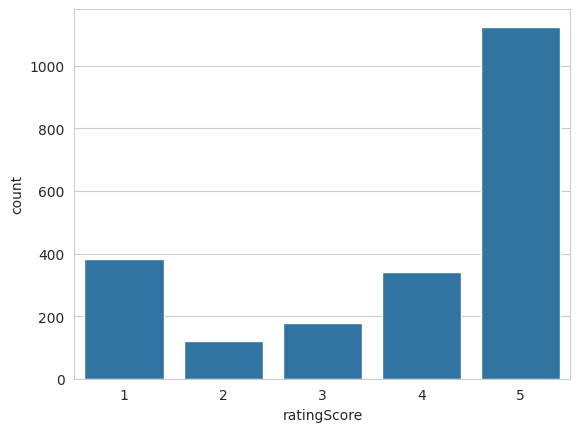

In [ ]:
filtered_data = filtered_data.dropna()
print(f"Number of null in label: { filtered_data['ratingScore'].isnull().sum() }")
print(f"Number of null in text: { filtered_data['reviewDescription'].isnull().sum()}")
print(f"Number of null in text: { filtered_data['reviewTitle'].isnull().sum()}")
sns.countplot(x='ratingScore', data=filtered_data);


# **Visualizing Word Clouds**

In [ ]:
from wordcloud import WordCloud

In [ ]:
filtered_data_negative = filtered_data[ (filtered_data['ratingScore']==1.0) | (filtered_data['ratingScore']==2.0) | (filtered_data['ratingScore']==3.0)]
filtered_data_positive = filtered_data[ (filtered_data['ratingScore']==4.0) | (filtered_data['ratingScore']==5.0)]
#listing review desc
negative_list=filtered_data_negative['lemmatized_review'].tolist()+[]+filtered_data_negative['lemmatized_title'].tolist()
positive_list= filtered_data_positive['lemmatized_review'].tolist()+[]+filtered_data_positive['lemmatized_title'].tolist()

#kembalikan bentuk string
filtered_negative = ("").join(str(negative_list))
filtered_negative = filtered_negative.lower()
filtered_positive = ("").join(str(positive_list))
filtered_positive = filtered_positive.lower()

<h3><b>Word Cloud</b>: Positive Reviews</h3>

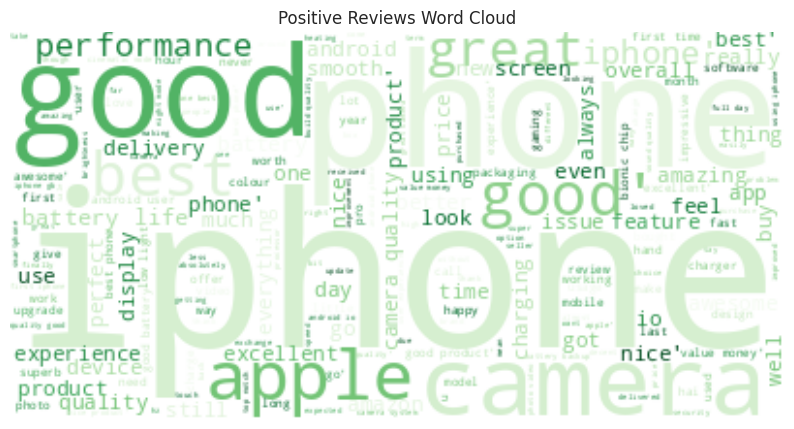

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

<h3><b>Word Cloud</b>: Negative Reviews</h3>

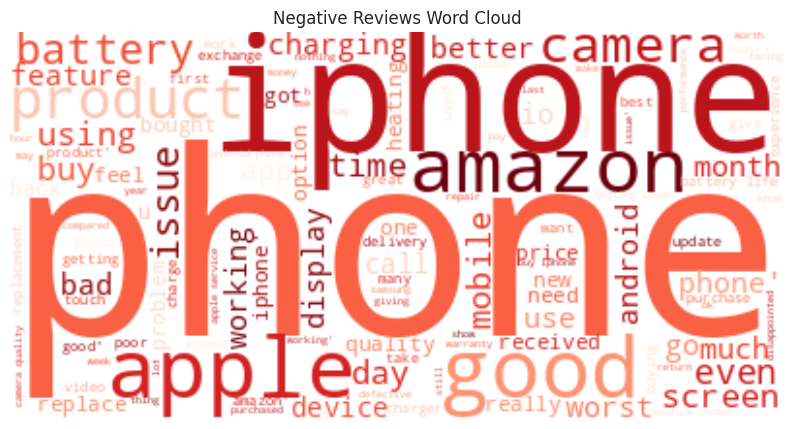

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

# **Feature Extraction from Text**

*   Vectorizer : TF-IDF

In [ ]:
X = filtered_data[['lemmatized_review','lemmatized_title', 'Review_len','title_len', 'punct','titlepunct']]
y = filtered_data['label']
print(X.shape)
print(y.shape)

(2146, 6)
(2146,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1502, 6)
(644, 6)
(1502,)
(644,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
X_train['combined_text'] = X_train['lemmatized_review'] + " " + X_train['lemmatized_title']
X_test['combined_text'] = X_test['lemmatized_review'] + " " + X_test['lemmatized_title']

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.5, min_df=2)  # Mengatur parameter max_df dan min_df
tfidf_train = tfidf.fit_transform(X_train['combined_text'])  # Fit-transform pada data latih
tfidf_test = tfidf.transform(X_test['combined_text'])        # Transform pada data uji


X_train_vect = pd.concat([X_train[['Review_len', 'punct', 'title_len', 'titlepunct']].reset_index(drop=True),
                          pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Review_len', 'punct', 'title_len', 'titlepunct']].reset_index(drop=True),
                         pd.DataFrame(tfidf_test.toarray())], axis=1)

# pastikan semua nama kolom menjadi string
X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

X_train_vect.head()
X_train_vect.head()


Review_len  punct  title_len  titlepunct    0    1    2    3    4    5  \
0         426    2.6         13         0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1          66    4.5         29         3.4  0.0  0.0  0.0  0.0  0.0  0.0   
2         109   10.1         75         0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3         334    1.5         37         2.7  0.0  0.0  0.0  0.0  0.0  0.0   
4          17    0.0         20         0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     6    7    8    9   10   11   12   13   14   15   16   17   18   19   20  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    21   22   23   24   25   26   27   28   29   30   31   32   33   34   35  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    36   37   38   39   40   41   42   43   44   45   46   47   48   49   50  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    51   52   53   54   55   56   57   58   59   60   61   62   63   64   65  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    66   67   68   69   70   71        72   73   74   75   76   77   78  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.183093  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.097599  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   

         79   80   81   82   83   84   85   86   87   88        89   90   91  \
0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.428925  0.0  0.0   
1  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
2  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.080842  0.0  0.0   
3  0.088664  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.091456  0.0  0.0   
4  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   

    92   93   94   95   96   97   98   99       100  101  102  103  104  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.117275  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   

        105  106  107  108  109  110  111  112  113  114  115  116  117  118  \
0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.152012  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

# **Visualize Confusion Matrix**
*   Vectorizer : TF-IDF

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<h3><u>Algoritma</u> : Multinomial Naive Bayes</h3>

              precision    recall  f1-score   support

           0       0.66      0.59      0.62       203
           1       0.82      0.86      0.84       441

    accuracy                           0.78       644
   macro avg       0.74      0.73      0.73       644
weighted avg       0.77      0.78      0.77       644



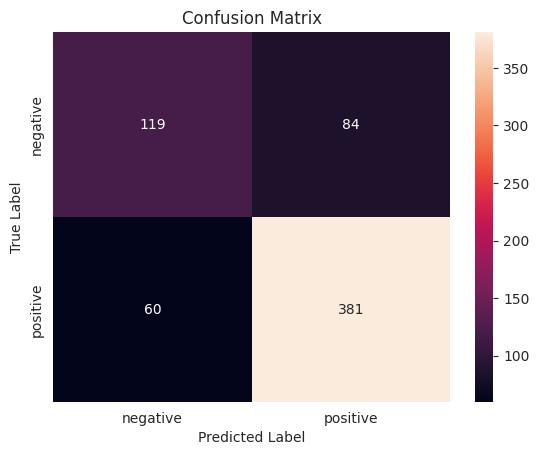

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h3><u>Algoritma</u>: Random Forest Classifier</h3>

              precision    recall  f1-score   support

           0       0.91      0.69      0.78       203
           1       0.87      0.97      0.92       441

    accuracy                           0.88       644
   macro avg       0.89      0.83      0.85       644
weighted avg       0.88      0.88      0.88       644



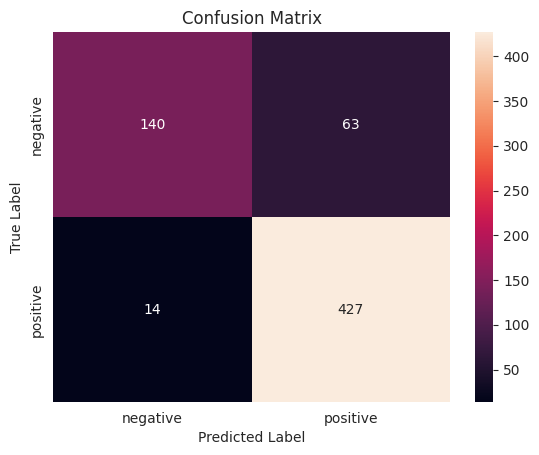

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h3><u>Algoritma</u>: Logistic Regression</h3>

              precision    recall  f1-score   support

           0       0.83      0.64      0.72       203
           1       0.85      0.94      0.89       441

    accuracy                           0.84       644
   macro avg       0.84      0.79      0.81       644
weighted avg       0.84      0.84      0.84       644



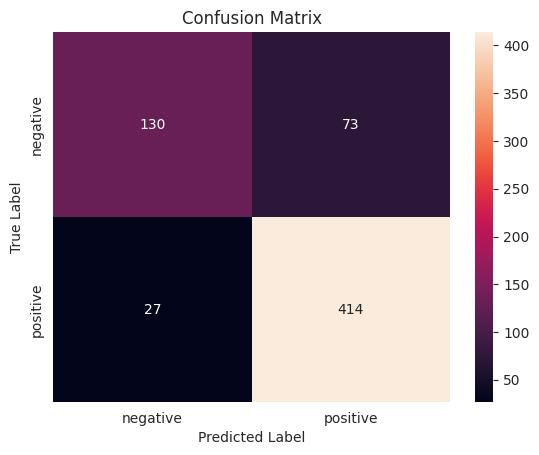

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h3><u>Algoritma</u>: Support Vector Machine (SVM)</h3>

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.68      1.00      0.81       441

    accuracy                           0.68       644
   macro avg       0.34      0.50      0.41       644
weighted avg       0.47      0.68      0.56       644



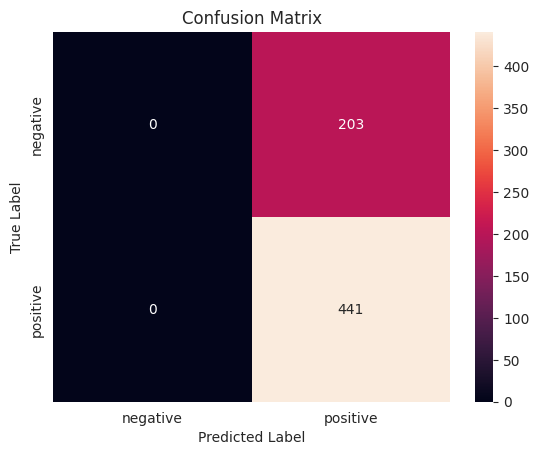

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

sigmoid

              precision    recall  f1-score   support

           0       0.18      0.19      0.18       203
           1       0.62      0.60      0.61       441

    accuracy                           0.47       644
   macro avg       0.40      0.39      0.39       644
weighted avg       0.48      0.47      0.47       644



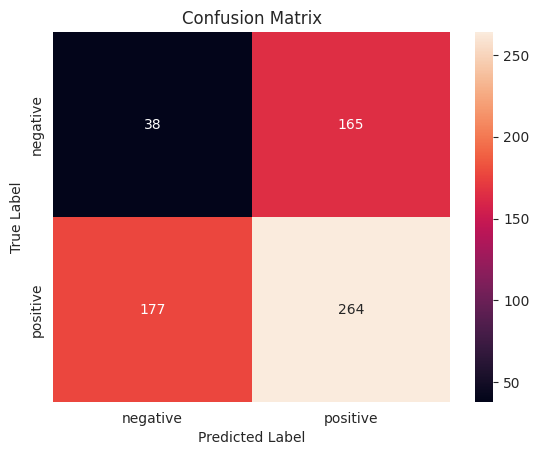

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h3><u>Algoritma</u>: K-Nearest Neighbor (KNN)</h3>

              precision    recall  f1-score   support

           0       0.50      0.32      0.39       203
           1       0.73      0.85      0.79       441

    accuracy                           0.68       644
   macro avg       0.62      0.59      0.59       644
weighted avg       0.66      0.68      0.66       644



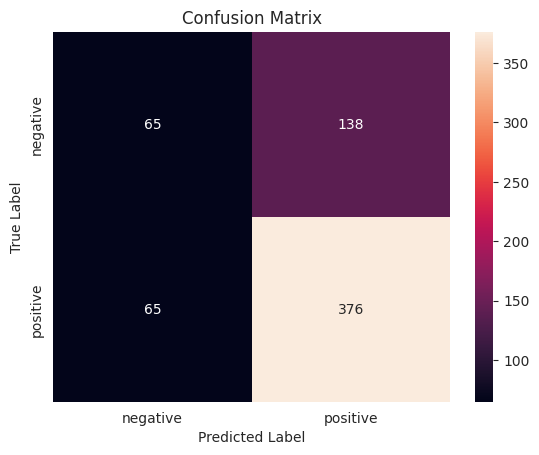

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h3><u>Algoritma</u>: Extra Trees Classifier</h3>

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       203
           1       0.90      0.95      0.92       441

    accuracy                           0.89       644
   macro avg       0.89      0.86      0.87       644
weighted avg       0.89      0.89      0.89       644



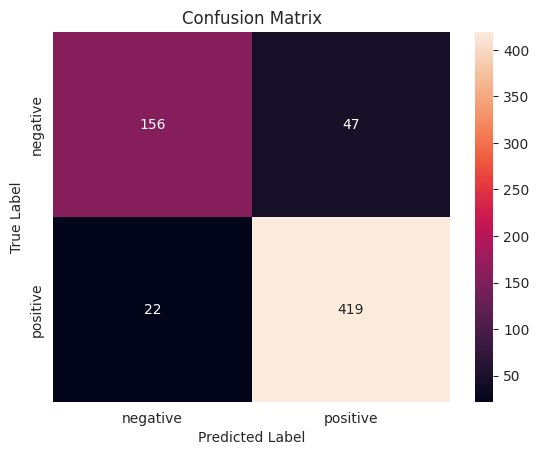

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Performing K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'rbf'),
          SVC(kernel = 'sigmoid'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVMrbf",'SVMsig', "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.7616997792494481 
 precision - 0.8104280782610924 
 recall - 0.8498667428136303 
 f1 - 0.8295331839102061 

Logistic Regression
 accuracy - 0.8335584988962472 
 precision - 0.8393557866742241 
 recall - 0.9385684370835714 
 f1 - 0.8856184331332733 

Random Forest
 accuracy - 0.8788388520971303 
 precision - 0.8723496871417125 
 recall - 0.9580239862935466 
 f1 - 0.9125573057165278 

SVMrbf
 accuracy - 0.681757174392936 
 precision - 0.6826699260707884 
 recall - 0.9980582524271846 
 f1 - 0.8107648599261061 

SVMsig
 accuracy - 0.5312847682119206 
 precision - 0.651497229993833 
 recall - 0.6734818199124311 
 f1 - 0.6617978656919552 

KNN
 accuracy - 0.6791125827814569 
 precision - 0.7385043125295312 
 recall - 0.82173995811917 
 f1 - 0.777274284225815 

Extra Trees
 accuracy - 0.8914878587196469 
 precision - 0.9005432193906311 
 recall - 0.9453264801066057 
 f1 - 0.9222272337141465 



# **Predictions**


*   <u>Vectorizer</u> : CountVectorizer (Bag of words)
*   <u>Algoritma</u>  : Multinomial Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
filtered_data['combined_text'] = filtered_data['lemmatized_review'] + " " + filtered_data['lemmatized_title']
X_cv = cv.fit_transform(filtered_data['combined_text']) # Fit the Data
y_cv = filtered_data['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.8944099378881988

In [ ]:
# Load file baru
new_data = pd.read_csv('/content/new_iphone_review.csv')
print(new_data.head())

vect_new = cv.transform(new_data['text']).toarray()
predictions1 = clf.predict(vect_new)
print(predictions1)

                                                text
0     The battery life is amazing and lasts all day.
1  I love the camera quality, especially in low l...
2  The design feels outdated compared to other br...
3    Face ID is very convenient and works perfectly.
4  The phone overheats when playing games for a l...
[1 1 1 1 1 1 1 1 1 1]








---

*   <u>Vectorizer</u>: TF-IDF
*   <u>Algoritma</u>: Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.9006211180124224

In [ ]:
# Load file baru
new_data = pd.read_csv('/content/new_iphone_review.csv')
print(new_data.head())

vect_new = tfidf.transform(new_data['text']).toarray()
predictions2 = classifier.predict(vect_new)
print(predictions2)

                                                text
0     The battery life is amazing and lasts all day.
1  I love the camera quality, especially in low l...
2  The design feels outdated compared to other br...
3    Face ID is very convenient and works perfectly.
4  The phone overheats when playing games for a l...
[1 1 1 1 1 0 1 1 1 1]


In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification